## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jun  2 08:47:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

from IPython.display import display, Image

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="ZrWFDhxm4yBWfcV3ygnq")
project = rf.workspace("tronghieu-yfska").project("obb_yolov8.1")

version = project.version(6)
dataset = version.download("yolov8-obb")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to obb_yolov8.1-6 in yolov8-obb:: 100%|██████████| 252/252 [00:00<00:00, 10569.96it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=obb mode=train model=yolov8s-obb.pt data=path/to/your/data.yaml epochs=35 batch=8

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8s-obb.pt, data=/content/datasets/obb_yolov8.1-6/data.yaml, epochs=35, time=None, patience=100, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

/content


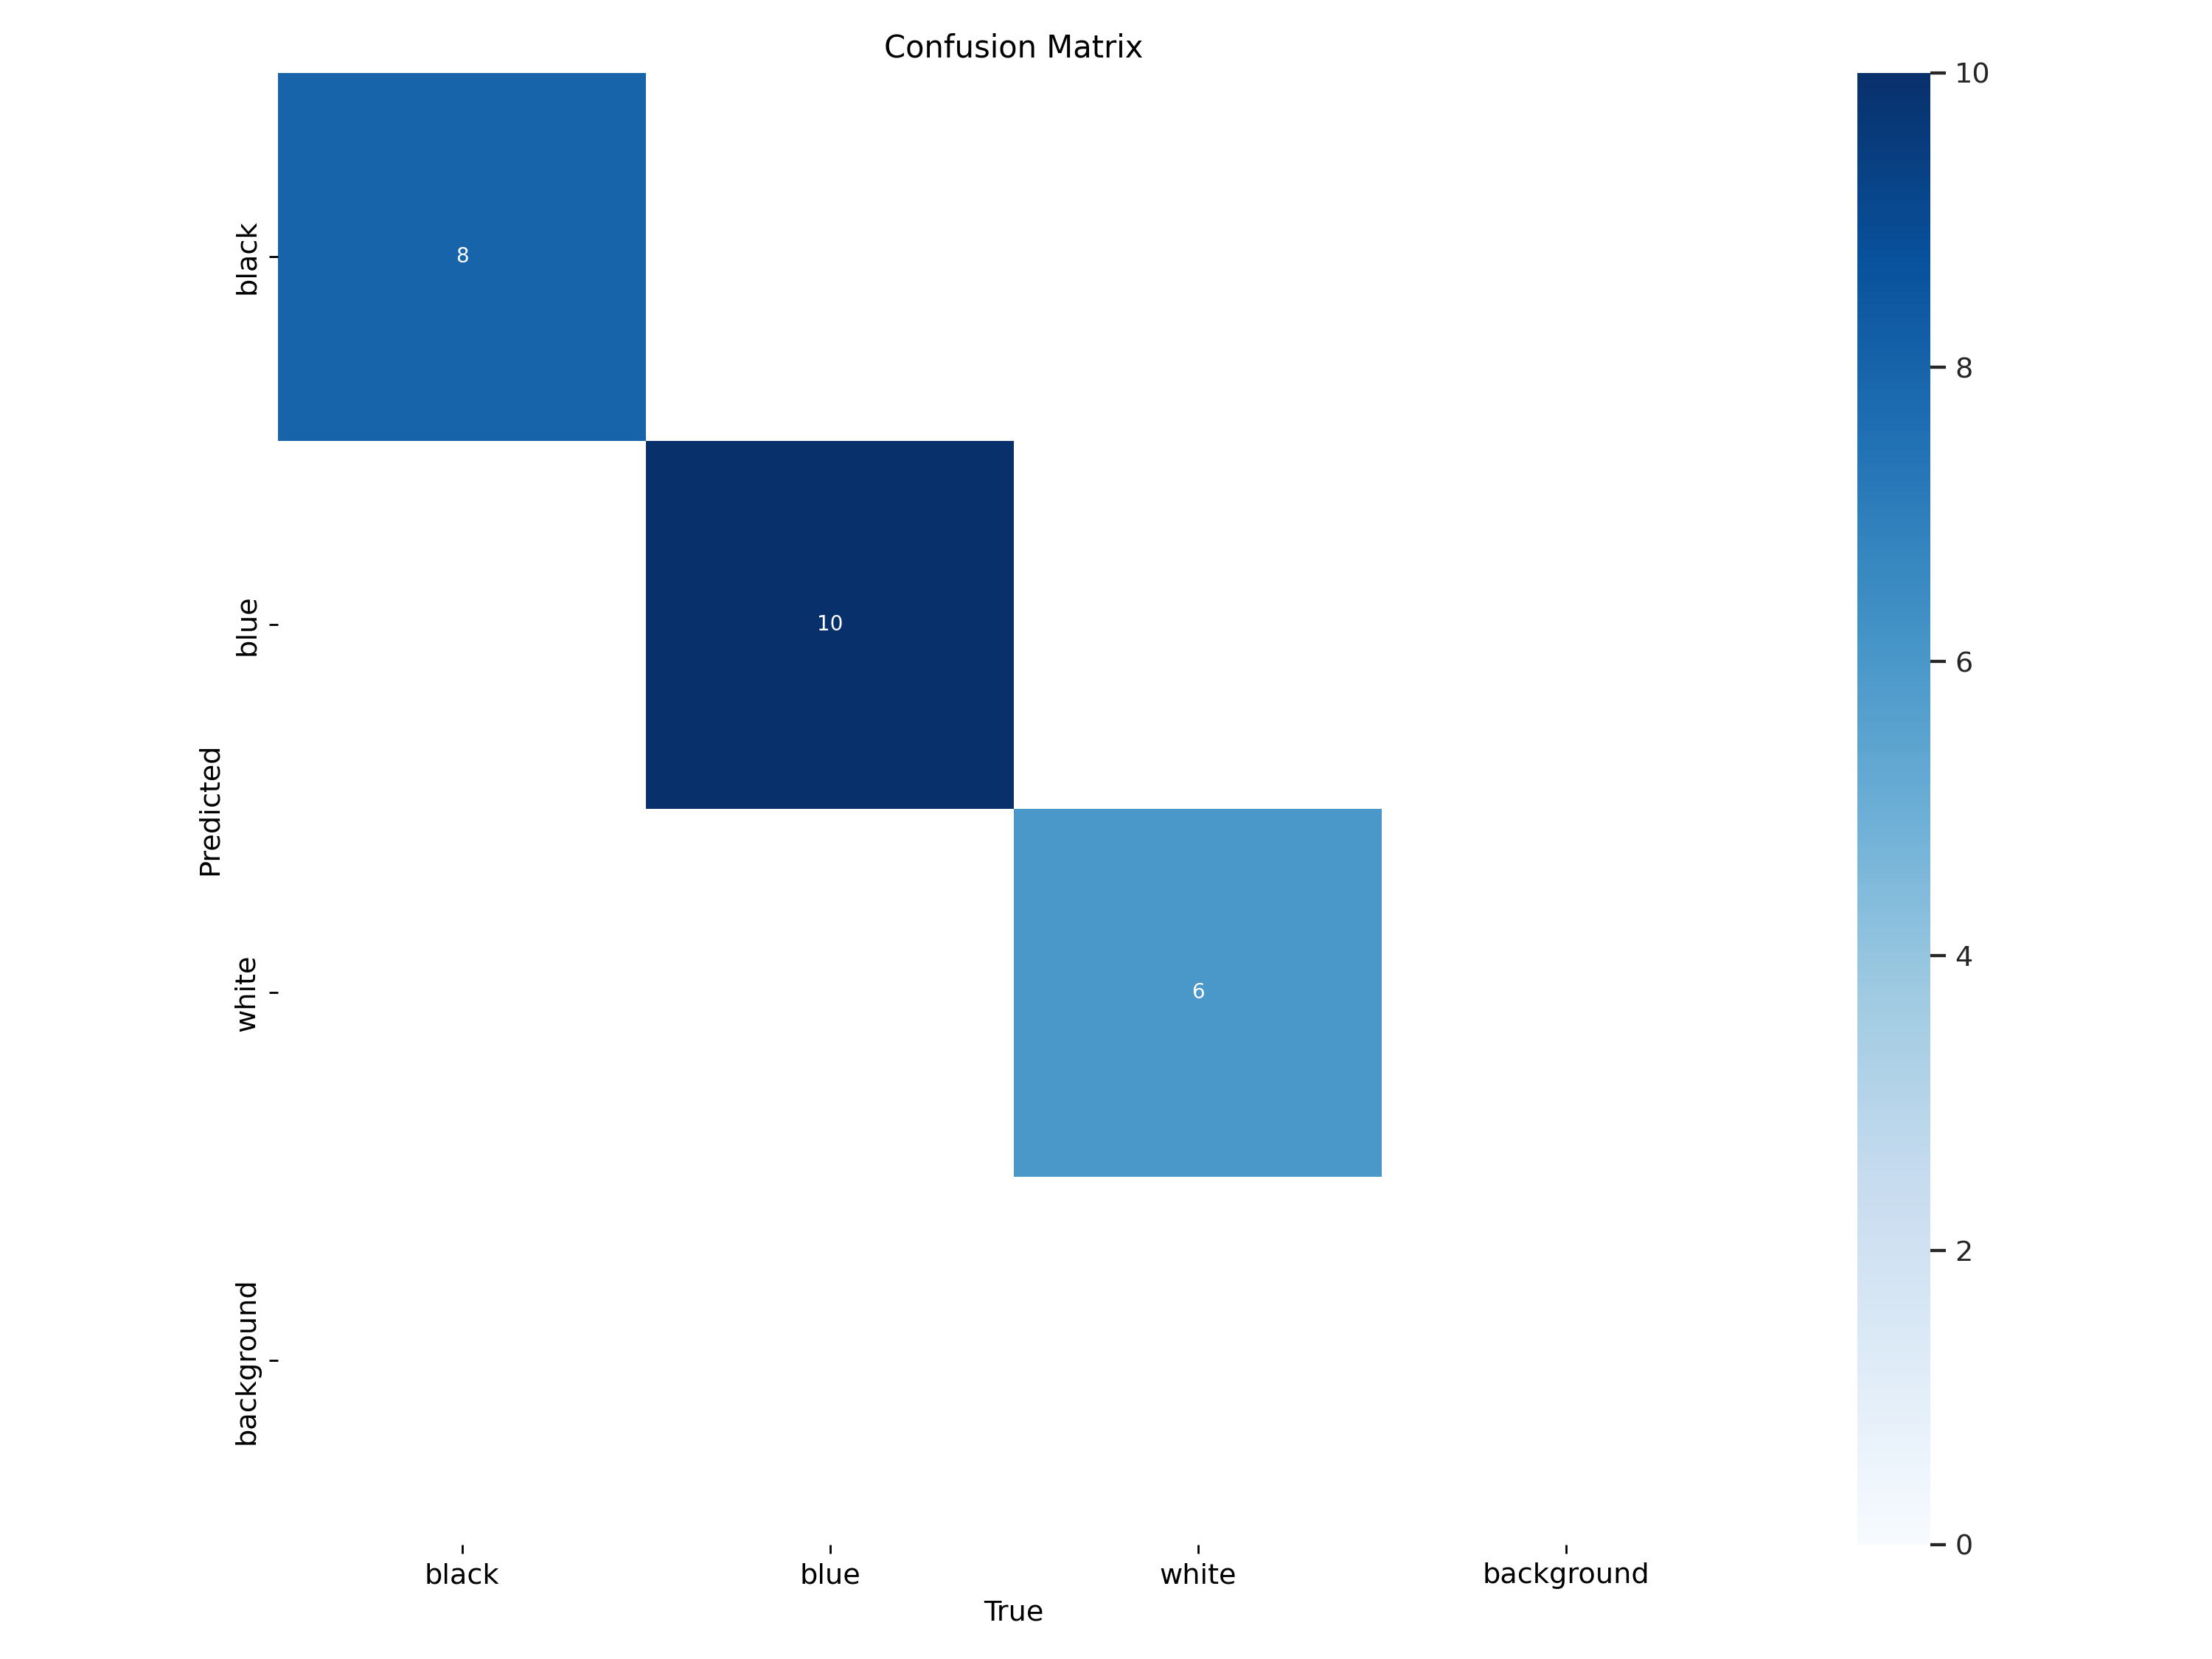

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train3/confusion_matrix.png', width=600)

/content


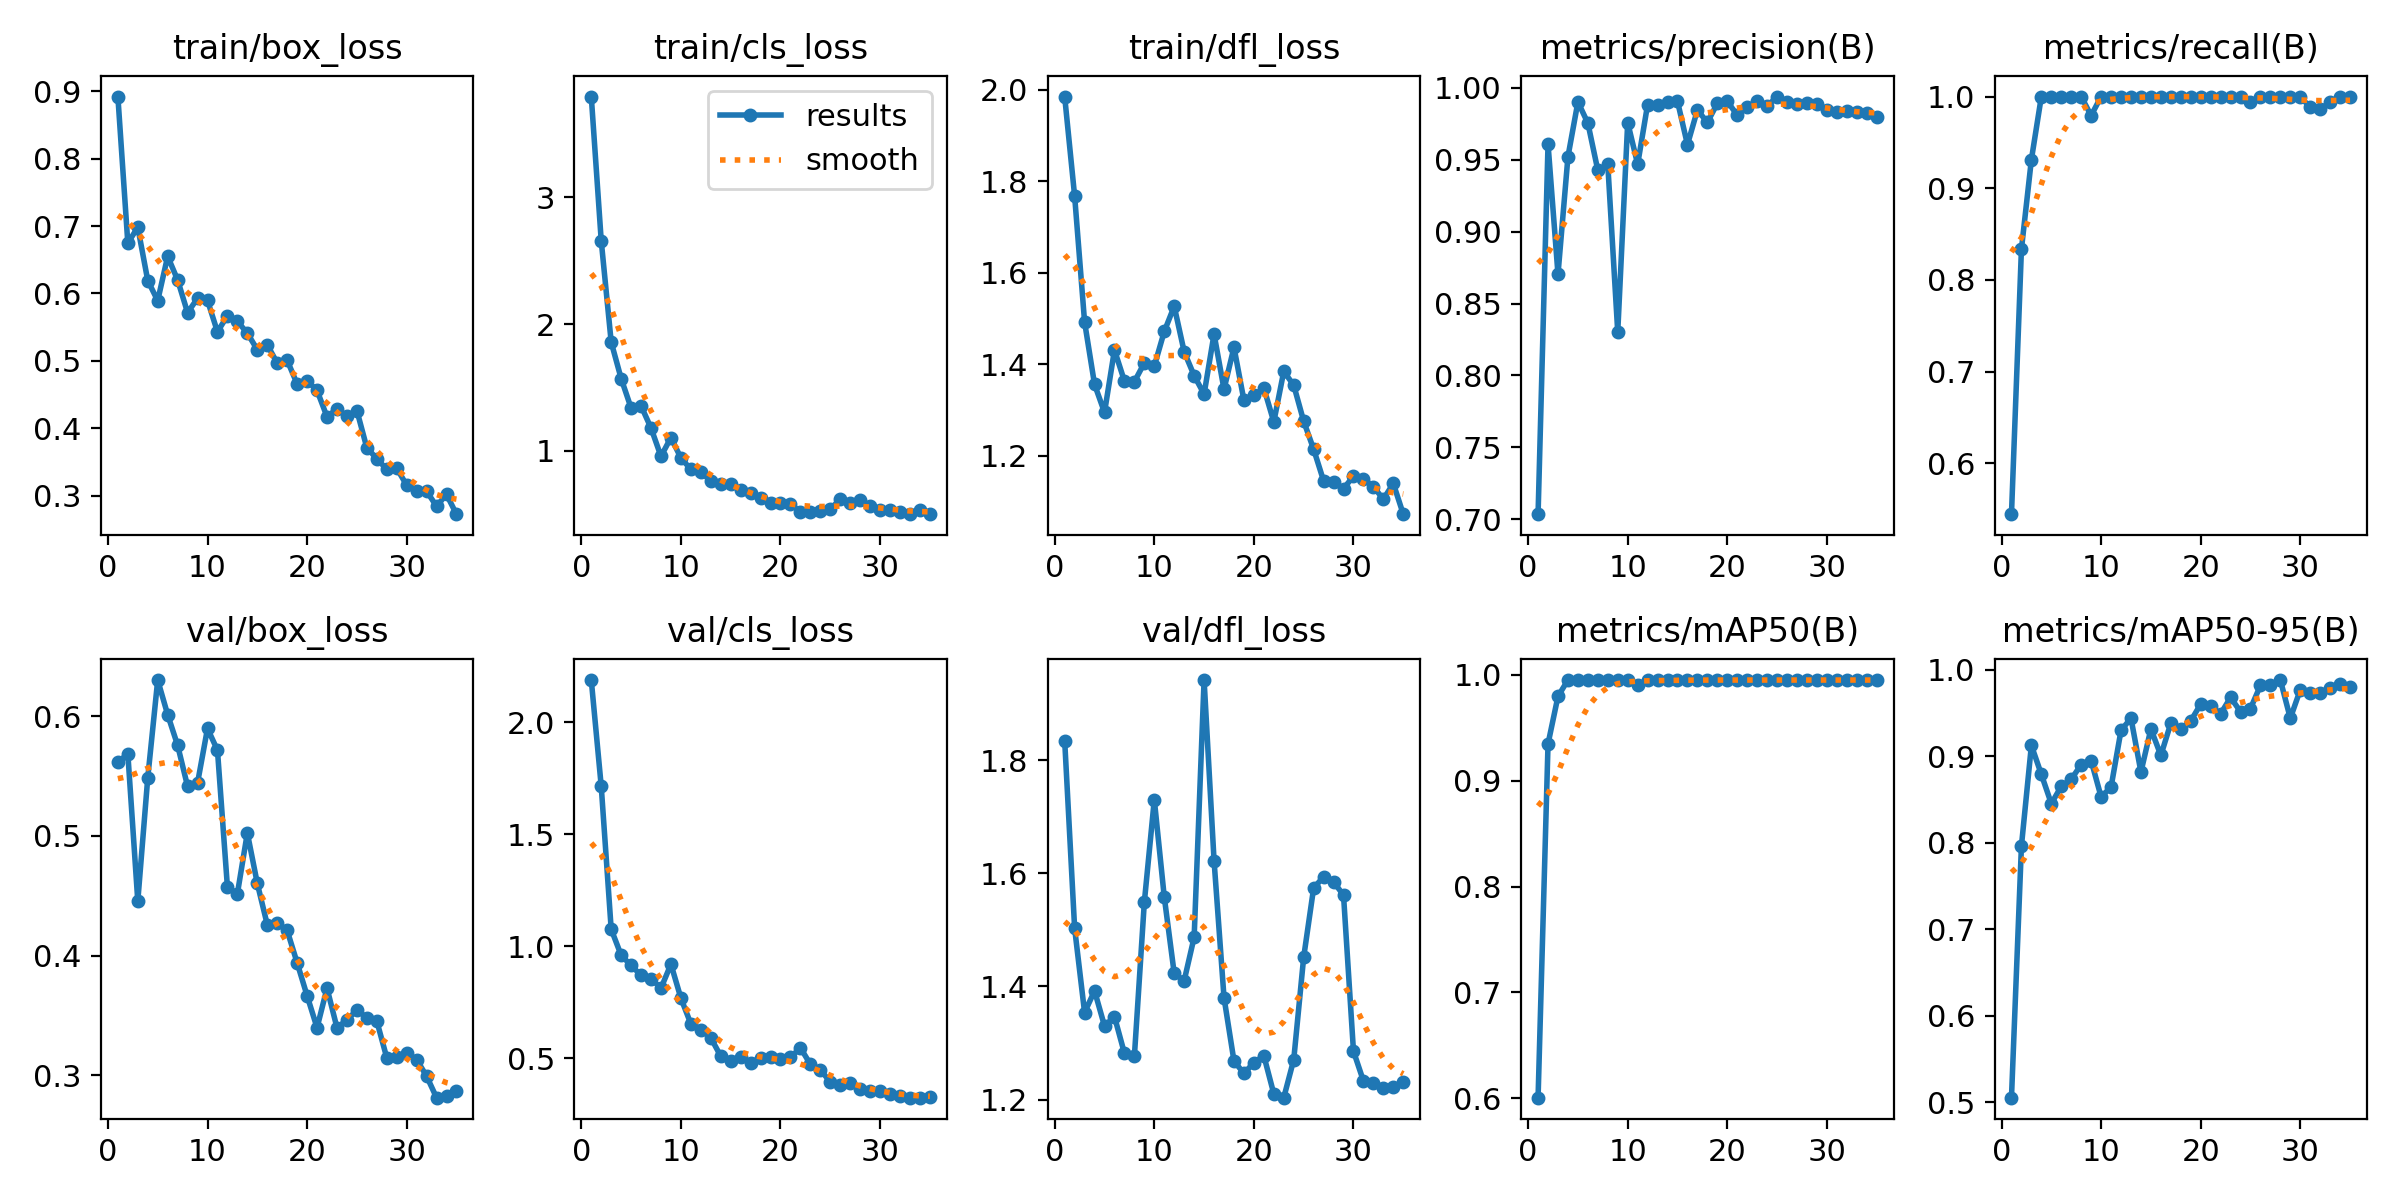

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train3/results.png', width=600)

/content


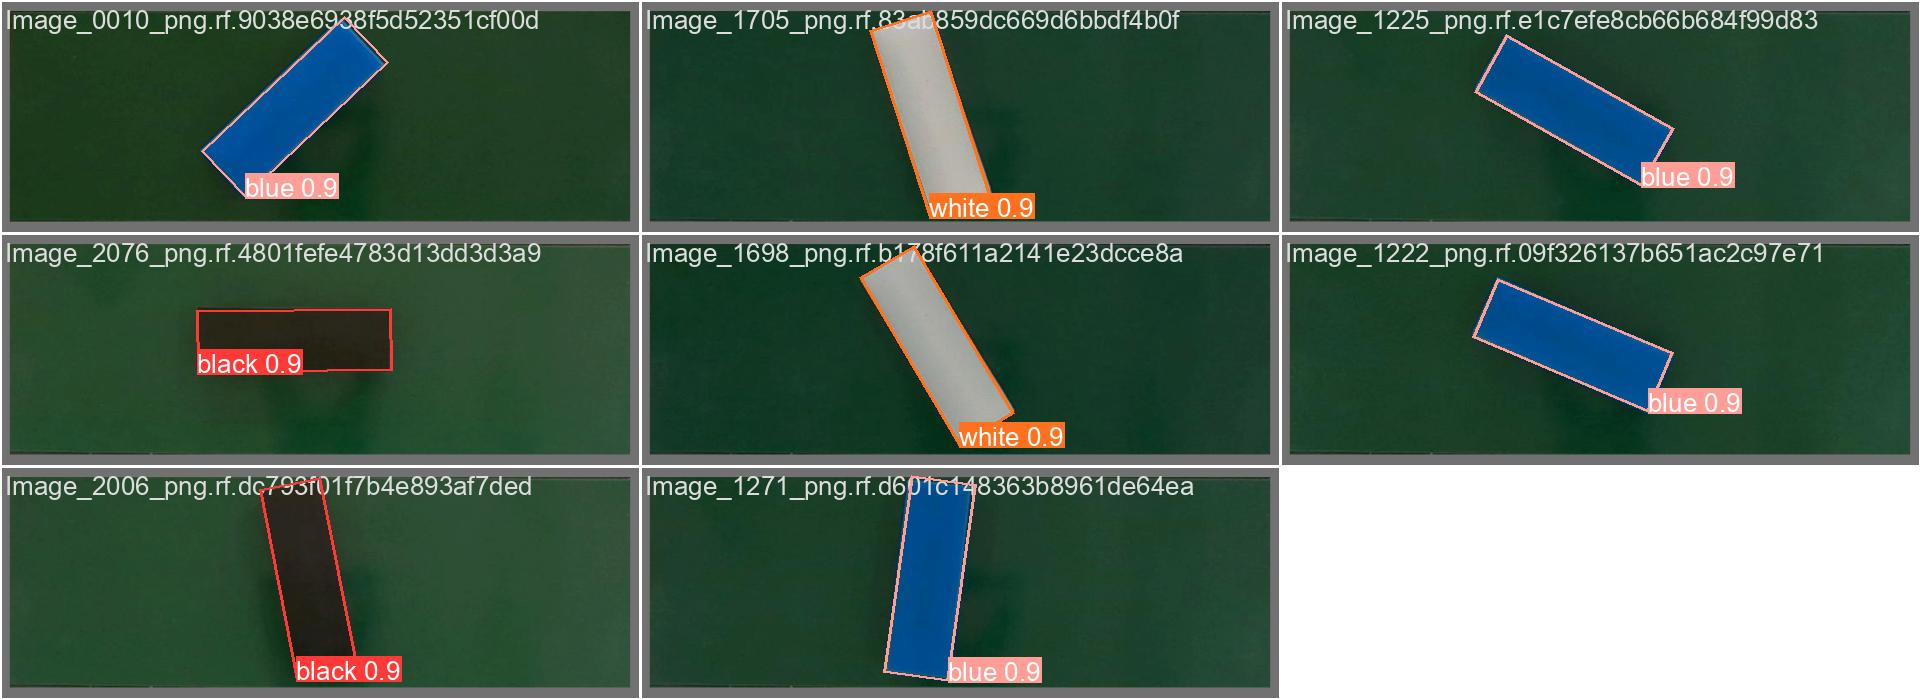

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=obb mode=val model={HOME}/runs/obb/train3/weights/best.pt data=/content/datasets/obb_yolov8.1-6/data.yaml

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11412732 parameters, 0 gradients, 29.4 GFLOPs
val: Scanning /content/datasets/obb_yolov8.1-6/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:03<00:00,  1.69s/it]
                   all         24         24      0.989          1      0.995      0.988
                 black          8          8      0.987          1      0.995      0.995
                  blue         10         10      0.996          1      0.995      0.974
                 white          6          6      0.985          1      0.995      0.995
Speed: 0.4ms preprocess, 23.3ms inference, 0.0ms loss, 46.3ms postprocess per image
Results saved to runs/obb/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=obb mode=predict model={HOME}/runs/obb/train3/weights/best.pt conf=0.5 source=/content/datasets/obb_yolov8.1-6/test/images save=true

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11412732 parameters, 0 gradients, 29.4 GFLOPs

image 1/12 /content/datasets/obb_yolov8.1-6/test/images/Image_0006_png.rf.cc77a56f52bb8ccbbb39b0ae32e7f4a9.jpg: 352x1024 253.0ms
image 2/12 /content/datasets/obb_yolov8.1-6/test/images/Image_0012_png.rf.58cea08dcee4816d9f2ddc8a4ec4950c.jpg: 352x1024 16.0ms
image 3/12 /content/datasets/obb_yolov8.1-6/test/images/Image_0014_png.rf.e6d525ef80e6fd04c5b559c183499f4f.jpg: 352x1024 15.9ms
image 4/12 /content/datasets/obb_yolov8.1-6/test/images/Image_0026_png.rf.979c8d53817d76572b723d2f17b669df.jpg: 352x1024 15.9ms
image 5/12 /content/datasets/obb_yolov8.1-6/test/images/Image_0032_png.rf.f8ce8d3bfdd4378a2921bb8d69ca38f0.jpg: 352x1024 15.9ms
image 6/12 /content/datasets/obb_yolov8.1-6/test/images/Image_0429_png.rf.5e1a8ec26b6ae3e64a583bdbe76ff200.jpg: 352x1024 15.9ms
image 7/12 /content/datasets/obb_yolov8.1-6/tes

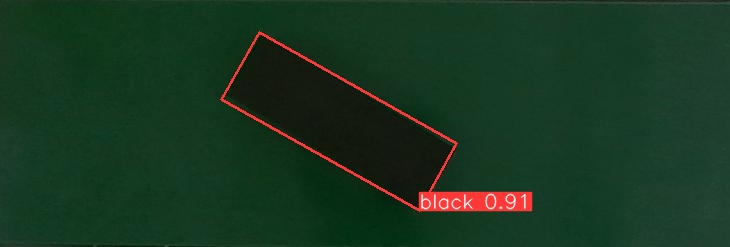

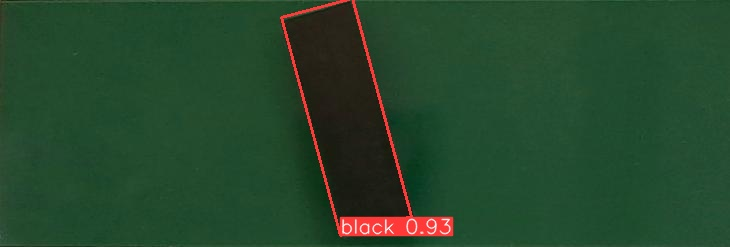

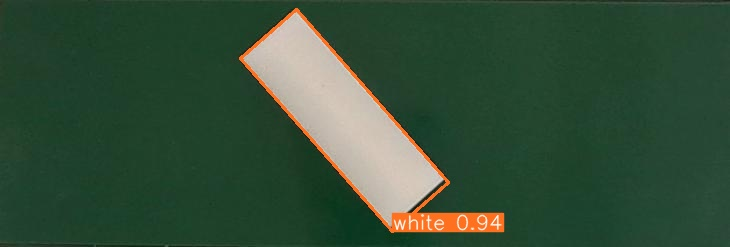

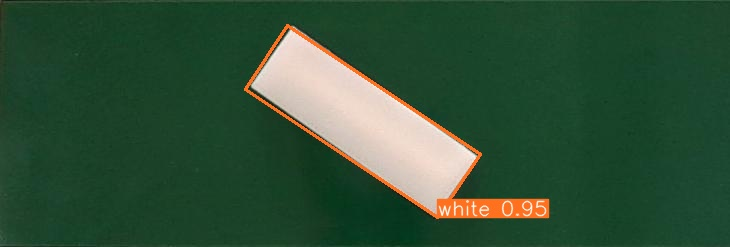

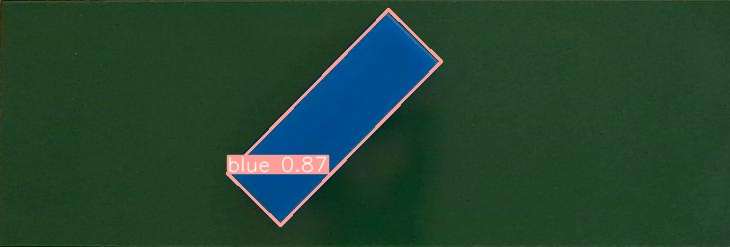

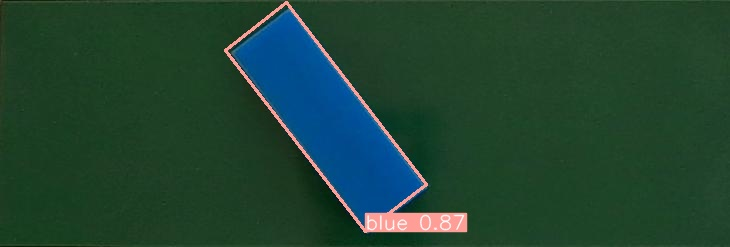

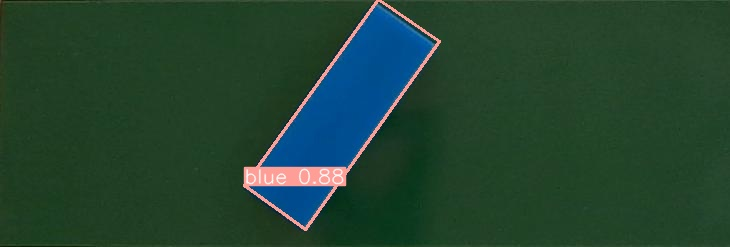

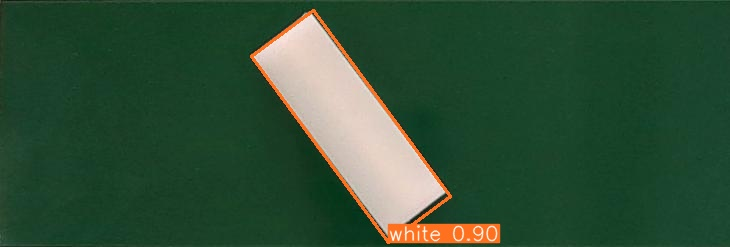

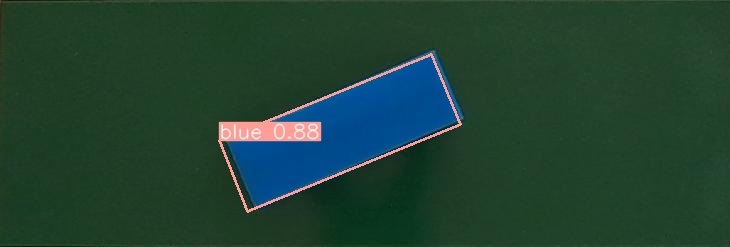

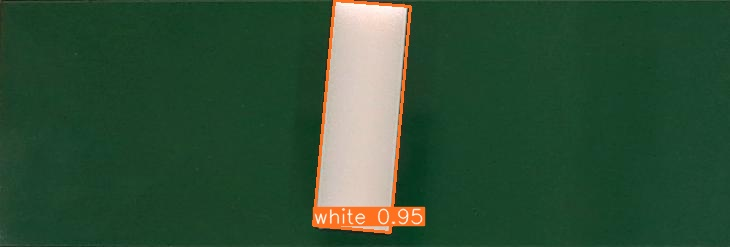

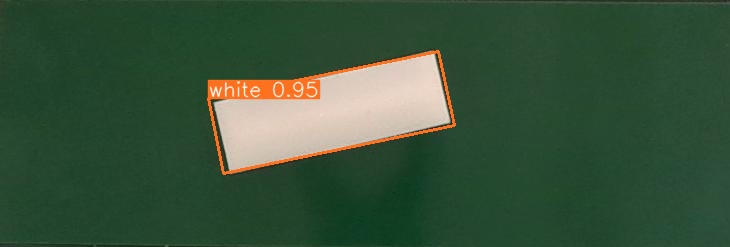

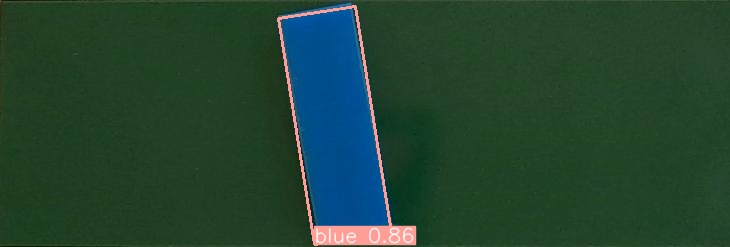

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/obb/predict/*.jpg'):
      display(Image(filename=image_path))#, height=600))
      print("\n")